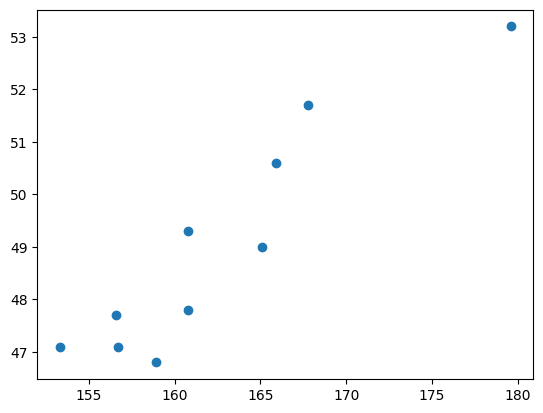

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./sl_linreg_ex_ring.csv")

plt.figure()
plt.scatter(df["height"], df["ringlength"])
plt.show()

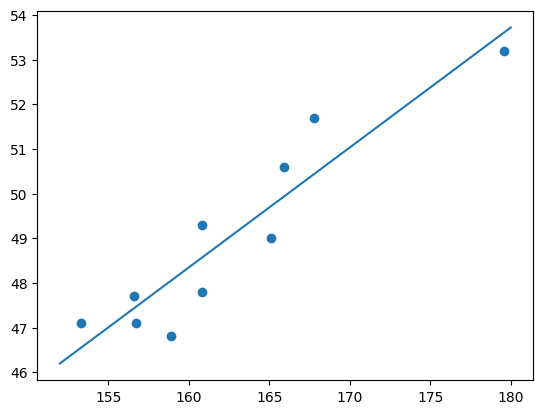

In [3]:
from sklearn.linear_model import LinearRegression

X = df["height"].to_numpy().reshape(-1, 1)
y = df["ringlength"].to_numpy().reshape(-1, 1)

regr = LinearRegression().fit(X,y)

xpts = np.linspace(152, 180, 1000)

plt.figure()
plt.plot(xpts, regr.predict(xpts.reshape(-1,1)))
plt.scatter(df["height"], df["ringlength"])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regr.fit(X_train,y_train)
regr.score(X_train, y_train)

0.9091445561668774

In [5]:
regr.score(X_test, y_test)

-6.087239684911816

In [6]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X, y, cv=3)
scores

array([0.75468997, 0.74975476, 0.77382931])

In [7]:
scores.mean()

0.7594246779223471

In [9]:
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv("./sl_linreg_ex_fitting.csv")

X = df["x"].to_numpy().reshape(-1, 1)
y = df["y"].to_numpy().reshape(-1, 1)

df_test = pd.read_csv("./sl_linreg_ex_fitting_test.csv")

X_test = df_test["x"].to_numpy().reshape(-1, 1)
y_test = df_test["y"].to_numpy().reshape(-1, 1)

poly = PolynomialFeatures(9)
X_ext = poly.fit_transform(X)
X_ext_test = poly.transform(X_test)

poly_regr = LinearRegression().fit(X_ext,y)
poly_regr.score(X_ext,y)

0.9999999999999843

In [13]:
poly_regr.score(X_ext_test,y_test)

0.7886373601418082

In [14]:
from sklearn.linear_model import Ridge

ridge_regr = Ridge(alpha=0.2).fit(X_ext,y)
ridge_regr.score(X_ext,y)

C:\Users\maayo\PycharmProjects\Sem2_ML\venv\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.95096e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.990780744926918

In [15]:
ridge_regr.score(X_ext_test,y_test)

0.8679361093493759